<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read data</a></span><ul class="toc-item"><li><span><a href="#US-data" data-toc-modified-id="US-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>US data</a></span></li></ul></li><li><span><a href="#Environment-similarity" data-toc-modified-id="Environment-similarity-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Environment similarity</a></span><ul class="toc-item"><li><span><a href="#filter-location-by-#-of-data-points" data-toc-modified-id="filter-location-by-#-of-data-points-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>filter location by # of data points</a></span></li><li><span><a href="#Factor-analysis" data-toc-modified-id="Factor-analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Factor analysis</a></span></li><li><span><a href="#Aggregate-envionrment-by-location-code" data-toc-modified-id="Aggregate-envionrment-by-location-code-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Aggregate envionrment by location code</a></span><ul class="toc-item"><li><span><a href="#Factor" data-toc-modified-id="Factor-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Factor</a></span></li><li><span><a href="#Original-variables" data-toc-modified-id="Original-variables-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Original variables</a></span></li></ul></li><li><span><a href="#Get-distance-by-each-observation" data-toc-modified-id="Get-distance-by-each-observation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Get distance by each observation</a></span><ul class="toc-item"><li><span><a href="#Factors" data-toc-modified-id="Factors-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Factors</a></span></li><li><span><a href="#Original-variables" data-toc-modified-id="Original-variables-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Original variables</a></span></li></ul></li><li><span><a href="#Calculate-distance" data-toc-modified-id="Calculate-distance-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Calculate distance</a></span><ul class="toc-item"><li><span><a href="#Calculate-and-reshape-distance" data-toc-modified-id="Calculate-and-reshape-distance-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Calculate and reshape distance</a></span></li><li><span><a href="#Classify-distance-level-based-on-distance" data-toc-modified-id="Classify-distance-level-based-on-distance-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Classify distance level based on distance</a></span></li><li><span><a href="#Add-distance-and-distance-level-into-dataframe" data-toc-modified-id="Add-distance-and-distance-level-into-dataframe-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Add distance and distance level into dataframe</a></span></li><li><span><a href="#Re-organize-stress-level" data-toc-modified-id="Re-organize-stress-level-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Re-organize stress level</a></span></li></ul></li><li><span><a href="#Test-and-compare" data-toc-modified-id="Test-and-compare-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Test and compare</a></span></li><li><span><a href="#Visualize-results" data-toc-modified-id="Visualize-results-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Visualize results</a></span></li></ul></li><li><span><a href="#Determine-clusters-of-all-environment" data-toc-modified-id="Determine-clusters-of-all-environment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Determine clusters of all environment</a></span></li><li><span><a href="#Determine-clusters-of-environment-for-Chile" data-toc-modified-id="Determine-clusters-of-environment-for-Chile-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Determine clusters of environment for Chile</a></span></li></ul></div>

In [1]:
def date(string):
    string2 = str(string)
    if len(string2)<6:
        a= 0
    else:
        a= 1
    return a    

def split(string):
    try:
        date_time_str = string.split(" ")[0]
    except:
        date_time_str = ''
    return date_time_str 

def naTyear(string):
    if type(string) == pd._libs.tslibs.nattype.NaTType:
        a = 0
    else:
        a = 1
    return a

def year(date):
    month = date.month
    day = date.day
    
    if (month == 1)&(day == 1):
        year = date.year
    else:
        year = date
    return year

def get_year(date):
    year = date.year
    
    return year


def tojulian(string):
    try:
        dt = string.split('/')
        dt2 = datetime(int(dt[2]), int(dt[0]), int(dt[1]))
        ju_dt = dt2.strftime('%j')
        return(ju_dt)
    except:
        return None
    
def tojulian(string):
    
    try:
        if len(string)>4:
            try:
                dt = string.split('/')
                dt2 = datetime(int(dt[2]), int(dt[0]), int(dt[1]))
                ju_dt = dt2.strftime('%j')
                return(ju_dt)

            except:
                return string
        else:
            return string
    except:
        return string
    
def str2nb(str0):
    try:
        str0b = str0[1:-1]
        nb = float(str0b)
    except:
        nb = str0
    return nb


def k_cluster(data, n_cluster, iteration):
    clusters_df1 = pd.DataFrame()
    sse_ls1 = []
    for rp in range(iteration):
        kmns = KMeans(n_clusters=n_cluster, n_init=15, max_iter=500, init='k-means++')
        kmns.fit(data)

        lb = kmns.labels_
        lb_df = pd.DataFrame(lb)
        clusters_df1 = pd.concat([clusters_df1, lb_df], axis=1)

        sses = kmns.inertia_
        sse_ls1.append(sses)
        
    sse_df1 = pd.DataFrame(sse_ls1)
    ind1 = sse_df1[0].argmin(axis=0)
    clusters= clusters_df1.iloc[:,ind1]
    
    return clusters

In [2]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
import pyxlsb
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids
from kneed import KneeLocator
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
import warnings
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as LR
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
os.chdir('C:/Users/s1052014/OneDrive - Syngenta/Desktop/NA_corn_WO/Data2021/Drought Stress/corn dataset/us_chile')

## Read data 

### US data 

In [4]:
us_ph = pd.read_csv('NEW_2016to2021_Pheno_UPDATED.csv')
us_ph = us_ph.loc[us_ph['market_segment']=='West']
us_ph = us_ph[['trial_id','location']].drop_duplicates()

us = pd.read_csv('US_ENV.csv')
us.rename(columns={'location_code':'trial_id'}, inplace=True)
us = pd.merge(us, us_ph, on=['trial_id'], how='inner')
us.rename(columns={'trial_id':'location_code'}, inplace=True)
us['location_code'] = us['location']
print(us.shape)
cl = pd.read_csv('Env_results_Chile.csv')
#cl = cl.loc[cl['year']>2016]
print(cl.shape)

(34423, 181)
(2339, 197)


In [5]:
us = us.iloc[:,:177]
cl = cl.iloc[:,:177]

cl['location']='CL'
us['location']= 'US'

cl.groupby(['location_code']).size()
cl = cl.loc[cl['location_code'].isin(['9059','925X'])]
cl.shape

cl.columns = us.columns
dta = pd.concat([us, cl], axis=0)
dta.shape

(36653, 178)

In [6]:
dta['HPRPlanting.VE'].loc[dta['HPRPlanting.VE']>200] = 200
dta['HPRVE.V6'].loc[dta['HPRVE.V6']>200] = 200
dta['HPRV6.VT'].loc[dta['HPRV6.VT']>200] = 200
dta['HPRVT.R2'].loc[dta['HPRVT.R2']>200] = 200
dta['HPRR2.R4'].loc[dta['HPRR2.R4']>200] = 200
dta['HPRR4.R6'].loc[dta['HPRR4.R6']>200] = 200
dta['HPRR6.Harvest'].loc[dta['HPRR6.Harvest']>200] = 200

heat_var = dta[['longitude', 'latitude','HPRPlanting.VE','HPRVE.V6','HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4', 'HPRR4.R6','HPRR6.Harvest',     
  'HeatPlanting-VE','HeatVE-V6','HeatV6-VT','HeatVT-R2', 'HeatR2-R4', 'HeatR4-R6','HeatR6-Harvest']]
drought_var = dta[['precsumPlanting-VE',
       'precsumVE-V6', 'precsumV6-VT', 'precsumVT-R2', 'precsumR2-R4',
       'precsumR4-R6', 'precsumR6-Harvest', 
'VaporPressureDeficitPlanting-VE',
 'VaporPressureDeficitVE-V6',
 'VaporPressureDeficitV6-VT',
 'VaporPressureDeficitVT-R2',
 'VaporPressureDeficitR2-R4',
 'VaporPressureDeficitR4-R6','VaporPressureDeficitR6-Harvest', 'vpdmaxPlanting-VE', 
        'vpdmaxVE-V6', 'vpdmaxV6-VT', 'vpdmaxVT-R2',
       'vpdmaxR2-R4', 'vpdmaxR4-R6', 'vpdmaxR6-Harvest',
 'rhavgPlanting-VE', 
'rhavgVE-V6',
 'rhavgV6-VT',
 'rhavgVT-R2',
 'rhavgR2-R4',
 'rhavgR4-R6','rhavgR6-Harvest', 'rhminPlanting-VE','rhminVE-V6', 'rhminV6-VT',
       'rhminVT-R2', 'rhminR2-R4', 'rhminR4-R6', 'rhminR6-Harvest']]
var1 = dta[['HPRPlanting.VE','HPRVE.V6','HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4', 'HPRR4.R6','HPRR6.Harvest',     
     'precsumPlanting-VE',  'precsumVE-V6', 'precsumV6-VT', 'precsumVT-R2', 'precsumR2-R4',
       'precsumR4-R6', 'precsumR6-Harvest', 'vpdmaxPlanting-VE', 
        'vpdmaxVE-V6', 'vpdmaxV6-VT', 'vpdmaxVT-R2',
       'vpdmaxR2-R4', 'vpdmaxR4-R6', 'vpdmaxR6-Harvest','rhavgPlanting-VE', 
'rhavgVE-V6',
 'rhavgV6-VT',
 'rhavgVT-R2',
 'rhavgR2-R4',
 'rhavgR4-R6','rhavgR6-Harvest', 'rhminPlanting-VE','rhminVE-V6', 'rhminV6-VT',
       'rhminVT-R2', 'rhminR2-R4', 'rhminR4-R6', 'rhminR6-Harvest']]
var2 = dta[['WaterDeficitPlanting-VE',
 'WaterDeficitVE-V6',
 'WaterDeficitV6-VT',
 'WaterDeficitVT-R2',
 'WaterDeficitR2-R4',
 'WaterDeficitR4-R6', 'WaterDeficitR6-Harvest', 'HeatPlanting-VE',
 'HeatVE-V6',
 'HeatV6-VT',
 'HeatVT-R2',
 'HeatR2-R4',
 'HeatR4-R6','HeatR6-Harvest','VaporPressureDeficitPlanting-VE',
 'VaporPressureDeficitVE-V6',
 'VaporPressureDeficitV6-VT',
 'VaporPressureDeficitVT-R2',
 'VaporPressureDeficitR2-R4',
 'VaporPressureDeficitR4-R6','VaporPressureDeficitR6-Harvest']]
var1 = var1.round(2)
var2 = var2.round(2)

In [7]:
#dh_var = pd.concat([heat_var, drought_var], axis=1)
dh_var = pd.concat([var1,var2], axis=1)
clms = dh_var.columns
dh_var = MinMaxScaler().fit_transform(dh_var)
dh_var = pd.DataFrame(dh_var)
dh_var.columns = clms
#dh_var = dh_var.round(1)
print(dh_var.shape)
dta.index = dh_var.index
dh_var['location'] = dta['location']
dh_var['location_code'] = dta['location_code']
dh_var = dh_var.drop_duplicates()
dh_var = dh_var.dropna()
cl_var = dh_var.loc[dh_var['location']=='CL']
us_var = dh_var.loc[dh_var['location']=='US']
cl_var.index = range(cl_var.shape[0])
us_var.index = range(us_var.shape[0])
print(dh_var.shape)

(36653, 56)
(6221, 58)


## Environment similarity 

### filter location by # of data points 

In [10]:
ts= us_var.groupby(['location_code']).size().sort_values()
ts = pd.DataFrame(ts)
ts = ts.reset_index()
print(ts.shape)
ts.columns=['location','count']
ts = ts.loc[ts['count']>0]
print(ts.shape)

cl_var = dh_var.loc[dh_var['location']=='CL']
us_var = dh_var.loc[dh_var['location']=='US']
print(us_var.shape)
us_var = us_var.loc[us_var['location_code'].isin(ts['location'])]
print(us_var.shape)
cl_var.index = range(cl_var.shape[0])
us_var.index = range(us_var.shape[0])

(257, 2)
(257, 2)
(5443, 58)
(5443, 58)


### Factor analysis 

In [11]:
cl_us = pd.concat([cl_var,us_var],axis=0)
cl_us2 = cl_us.drop(['location', 'location_code'], axis=1)

#cl_us2 = MinMaxScaler().fit_transform(cl_us2)

fact2 = FactorAnalyzer(n_factors=35, rotation="varimax", method="principal",  is_corr_matrix=False).fit(cl_us2)
print(fact2.get_factor_variance().round(3))
fac_var2 = pd.DataFrame(fact2.transform(cl_us2))

cl_us.index = fac_var2.index
us_fac2 = fac_var2.loc[cl_us['location']=='US',]
cl_fac2 = fac_var2.loc[cl_us['location']=='CL',]

cl_fac2.index = cl_var.index= range(cl_fac2.shape[0])
us_fac2.index = us_var.index= range(us_fac2.shape[0])

print(cl_fac2.shape)
print(us_fac2.shape)

(array([9.98986903, 6.18716434, 4.55550865, 3.13742083, 2.33232738,
       1.97872371, 1.65680482, 1.51421396, 1.49872551, 1.45800538,
       1.37843932, 1.33525337, 1.26873679, 1.22152117, 1.12905752,
       1.11536338, 1.04110314, 1.03676942, 1.02991377, 1.02011334,
       1.01702996, 1.00459662, 0.9897242 , 0.98430766, 0.90917929,
       0.67508519, 0.59585706, 0.56391136, 0.55312516, 0.52458455,
       0.49941463, 0.4800375 , 0.32250444, 0.30899957, 0.23319255]), array([0.17839052, 0.11048508, 0.08134837, 0.05602537, 0.0416487 ,
       0.03533435, 0.0295858 , 0.02703953, 0.02676296, 0.02603581,
       0.02461499, 0.02384381, 0.02265601, 0.02181288, 0.02016174,
       0.0199172 , 0.01859113, 0.01851374, 0.01839132, 0.01821631,
       0.01816125, 0.01793923, 0.01767365, 0.01757692, 0.01623534,
       0.01205509, 0.0106403 , 0.01006985, 0.00987723, 0.00936758,
       0.00891812, 0.0085721 , 0.00575901, 0.00551785, 0.00416415]), array([0.17839052, 0.2888756 , 0.37022396, 0.42624934, 0.

In [37]:
us_fac2['location_code'] = us_var['location_code']
cl_fac2['location_code'] = cl_var['location_code']

### Aggregate envionrment by location code 

#### Factor 

In [1394]:
us_fac2['location_code'] = us_var['location_code']
us_fac3 = us_fac2.groupby(['location_code']).median()
#us_fac3 = us_fac3.reset_index()

cl_fac2['location_code'] = cl_var['location_code']
cl_fac3 = cl_fac2.groupby(['location_code']).median()
#cl_fac3 = cl_fac3.reset_index()

dis_2 = cdist(us_fac3, cl_fac3)
dis_2 = pd.DataFrame(dis_2)
dis_2.index = us_fac3.index
dis_2.columns= cl_fac3.index
print(us_fac3.shape)
print(cl_fac3.shape)
print(dis_2.shape)

cl_fac_59 = pd.DataFrame(cl_fac3.iloc[0,:]).T
cl_fac_5X = pd.DataFrame(cl_fac3.iloc[1,:]).T

(257, 25)
(2, 25)
(257, 2)


#### Original variables 

In [1333]:
us_fac3 = us_var.drop(['location'],axis=1).groupby(['location_code']).median()
cl_fac3 = cl_var.drop(['location'],axis=1).groupby(['location_code']).median()
cl_fac_59 = pd.DataFrame(cl_fac3.iloc[0,:]).T
cl_fac_5X = pd.DataFrame(cl_fac3.iloc[1,:]).T

### Get distance by each observation 

#### Factors 

In [13]:
us_fac3 = us_fac2.copy()
cl_fac3 = cl_fac2.copy()
cl_fac_59 = cl_fac3.loc[cl_var['location_code']=='9059']
cl_fac_5X = cl_fac3.loc[cl_var['location_code']=='925X']

#### Original variables 

In [1323]:
us_fac3 = us_var.drop(['location','location_code'], axis=1).copy()
cl_fac3 = cl_var.drop(['location','location_code'],  axis=1).copy()
cl_fac_59 = cl_fac3.loc[cl_var['location_code']=='9059']
cl_fac_5X = cl_fac3.loc[cl_var['location_code']=='925X']

### Calculate distance 

#### Calculate and reshape distance 

In [25]:
from scipy.spatial.distance import cdist
dis_59= cdist(us_fac3, cl_fac_59, 'euclidean')
dis_59 = pd.DataFrame(dis_59)
dis_59.index = us_fac3.index
#dis_59 = dis_59.reset_index()
print(dis_59.shape)

dis_5X= cdist(us_fac3, cl_fac_5X, 'euclidean')
dis_5X = pd.DataFrame(dis_5X)
dis_5X.index = us_fac3.index
#dis_5X = dis_5X.reset_index()
print(dis_5X.shape)

disa59 = dis_59.to_numpy().reshape(-1,1)
disa5X = dis_5X.to_numpy().reshape(-1,1)

print(disa59.shape)
print(disa5X.shape)

nla= 7
da = np.concatenate([disa59, disa5X], axis=0)
da_clu = k_cluster(da, nla, 5)

print(da.shape)

(5443, 427)
(5443, 351)
(2324161, 1)
(1910493, 1)
(4234654, 1)


#### Classify distance level based on distance 

In [26]:
n01 = disa59.shape[0]
n02 = da.shape[0]
clu59 = da_clu[:n01]
clu5X = da_clu[n01:n02]

clu5X = clu5X.reset_index()[0]
dis59_df = pd.DataFrame(disa59)
dis59_df['cluster'] = clu59
dis5X_df = pd.DataFrame(disa5X)
dis5X_df['cluster'] = clu5X

print(dis59_df.groupby(['cluster']).describe())
print(dis5X_df.groupby(['cluster']).describe())

                0                                                        \
            count       mean       std        min        25%        50%   
cluster                                                                   
0        710215.0   9.516203  0.422139   8.851290   9.152506   9.475753   
1         22927.0  39.214173  1.654624  32.224460  39.160081  39.277893   
2        636633.0   6.899279  0.468404   5.076549   6.569630   6.966713   
3         15052.0  25.596655  2.437629  20.428251  24.570356  25.824075   
4        307355.0  11.281727  0.728418  10.379751  10.696567  11.096137   
5         63899.0  15.270158  1.543279  13.312421  13.970007  14.988727   
6        568080.0   8.214026  0.374697   7.592501   7.886177   8.200007   

                               
               75%        max  
cluster                        
0         9.848220  10.379727  
1        39.888011  51.233932  
2         7.289850   7.592499  
3        26.676205  32.223719  
4        11.669634  13.31

In [27]:
dis59_clu = dis59_df.groupby(['cluster']).median().sort_values([0])
dis5X_clu = dis5X_df.groupby(['cluster']).median().sort_values([0])
dis5X_clu = dis5X_clu.reset_index()
dis59_clu = dis59_clu.reset_index()
dis59_clu.columns = dis5X_clu.columns = ['cluster','Distance']
dis59_clu['Dis'] = range(dis59_clu.shape[0])
dis5X_clu['Dis'] = range(dis5X_clu.shape[0])
dis59_clu

dis59_df = pd.merge(dis59_df, dis59_clu, on=['cluster'])
dis5X_df = pd.merge(dis5X_df, dis5X_clu, on=['cluster'])

#### Add distance and distance level into dataframe 

In [28]:
nd = dis_59.shape[0]
clu59b = dis59_df[['Dis']].to_numpy().reshape(nd, dis_59.shape[1])
clu5Xb = dis5X_df[['Dis']].to_numpy().reshape(nd, dis_5X.shape[1])
clu59b = pd.DataFrame(clu59b)
clu5Xb = pd.DataFrame(clu5Xb)
clu59b.index
clu59b['location_code'] = us_var['location_code']
clu5Xb['location_code'] = us_var['location_code']
dis_59f = clu59b.groupby(['location_code']).mean().mean(axis=1)
dis_5Xf = clu5Xb.groupby(['location_code']).mean().mean(axis=1)
dis_59f = dis_59f.round(0)
dis_5Xf = dis_5Xf.round(0)
print(dis_59f.shape)
print(dis_5Xf.shape)


clu59bd = dis59_df[['Distance']].to_numpy().reshape(nd, dis_59.shape[1])
clu5Xbd = dis5X_df[['Distance']].to_numpy().reshape(nd, dis_5X.shape[1])
clu59bd = pd.DataFrame(clu59bd)
clu5Xbd = pd.DataFrame(clu5Xbd)
clu59bd['location_code'] = us_var['location_code']
clu5Xbd['location_code'] = us_var['location_code']
dis_59fd = clu59bd.groupby(['location_code']).mean().mean(axis=1)
dis_5Xfd = clu5Xbd.groupby(['location_code']).mean().mean(axis=1)

print(dis_59f.value_counts())
print(dis_5Xf.value_counts())

(257,)
(257,)
1.0    82
2.0    82
0.0    72
3.0    18
4.0     3
dtype: int64
1.0    127
0.0     63
2.0     61
4.0      3
3.0      3
dtype: int64


In [29]:
dis_matrix = pd.concat([dis_59f,dis_59fd,dis_5Xf,dis_5Xfd], axis=1)
dis_matrix.columns = ['9059','Dis_9059','925X','Dis_925X']
#dis_matrix = dis_matrix - 1
dis_matrix = dis_matrix.reset_index()
dis_matrix

,location_code,9059,Dis_9059,925X,Dis_925X
0,4439,2.0,8.837880,0.0,7.667371
1,5213,1.0,8.564506,0.0,7.424249
2,5226,2.0,9.475753,0.0,7.100086
3,5320,1.0,8.625256,1.0,7.856466
4,5330,1.0,8.710306,1.0,8.007742
...,...,...,...,...,...
252,9C02,0.0,6.966713,1.0,8.247468
253,9C13,0.0,6.966713,1.0,8.247468
254,9C15,2.0,9.475753,2.0,9.369227
255,9C23,2.0,9.475753,2.0,9.369227


#### Re-organize stress level 

In [30]:
dis_matrix['9059'] = dis_matrix['9059'] + 1
dis_matrix['925X'] = dis_matrix['925X'] + 1
print(dis_matrix['9059'].value_counts())
print(dis_matrix['925X'].value_counts())

dis_matrix['9059'].loc[dis_matrix['9059']<1]=1
dis_matrix['9059'].loc[dis_matrix['9059']>4]=4
dis_matrix['925X'].loc[dis_matrix['925X']<1]=1
dis_matrix['925X'].loc[dis_matrix['925X']>4]=4

print(dis_matrix['9059'].value_counts())
print(dis_matrix['925X'].value_counts())

2.0    82
3.0    82
1.0    72
4.0    18
5.0     3
Name: 9059, dtype: int64
2.0    127
1.0     63
3.0     61
5.0      3
4.0      3
Name: 925X, dtype: int64
2.0    82
3.0    82
1.0    72
4.0    21
Name: 9059, dtype: int64
2.0    127
1.0     63
3.0     61
4.0      6
Name: 925X, dtype: int64


In [31]:
us2 = us[['location_code','longitude','latitude']].groupby(['location_code']).mean()
us2 = us2.reset_index()
us2.head(3)

dis_df2 = pd.merge(us2, dis_matrix, on=['location_code'], how='left')
#dis_df2.to_csv('Distance_level_US_CL.csv', index=False)
dis_df2 = dis_df2.drop_duplicates()
dis_df2.head(3)

,location_code,longitude,latitude,9059,Dis_9059,925X,Dis_925X
0,4439,-94.0360,43.4370,3.0,8.837880,1.0,7.667371
1,5213,-101.4468,40.9920,2.0,8.564506,1.0,7.424249
2,5226,-101.7452,38.7865,3.0,9.475753,1.0,7.100086


In [32]:
dis_df2.corr().round(2)

,longitude,latitude,9059,Dis_9059,925X,Dis_925X
longitude,1.00,0.09,0.09,0.05,0.12,-0.01
latitude,0.09,1.00,0.07,0.15,0.08,0.11
9059,0.09,0.07,1.00,0.87,0.50,0.60
Dis_9059,0.05,0.15,0.87,1.00,0.55,0.72
925X,0.12,0.08,0.50,0.55,1.00,0.86
Dis_925X,-0.01,0.11,0.60,0.72,0.86,1.00


In [33]:
print(dis_df2.groupby(['9059'])['Dis_9059'].describe().round(2))
print(dis_df2.groupby(['925X'])['Dis_925X'].describe().round(2))
print(dis_df2.groupby(['9059','925X']).size())

      count   mean   std    min    25%    50%    75%    max
9059                                                       
1.0    72.0   7.14  0.21   6.97   6.97   7.03   7.28   7.58
2.0    82.0   8.31  0.31   7.75   8.20   8.21   8.52   9.09
3.0    82.0   9.88  1.06   8.84   9.21   9.48  10.16  13.74
4.0    21.0  12.65  1.64  10.38  11.10  12.53  13.94  15.57
      count   mean   std    min    25%    50%    75%    max
925X                                                       
1.0    63.0   7.27  0.22   7.10   7.10   7.10   7.48   7.70
2.0   127.0   8.29  0.35   7.73   8.10   8.25   8.37   9.79
3.0    61.0   9.57  0.66   8.80   9.12   9.37   9.93  11.72
4.0     6.0  13.55  1.79  11.52  12.01  13.80  15.16  15.16
9059  925X
1.0   1.0      3
      2.0     69
2.0   1.0     54
      2.0     24
      3.0      4
3.0   1.0      6
      2.0     34
      3.0     42
4.0   3.0     15
      4.0      6
dtype: int64


In [ ]:
dis_df2.to_csv('Location_Difference_Level_US_CL_West_MK.csv', index=False)

### Test and compare 

In [41]:
ts = pd.read_csv('Location_Difference_Level_US_CL_West_MK.csv')
ts.head(3)

ts0 = dis_df2[['9059','925X']]
ts0[['9059b','925Xb']] = ts[['Difference_level_9059','Difference_level_925X']]
print(ts0.groupby(['9059','9059b']).size())
print(ts0.groupby(['925X','925Xb']).size())

,location_code,longitude,latitude,Difference_level_9059,Difference_level_925X,Mean_distance_9059,Mean_distance_925X
0,4439,-94.0360,43.4370,3,1,8.825403,7.095896
1,5213,-101.4468,40.9920,2,1,8.186432,7.095896
2,5226,-101.7452,38.7865,3,1,9.464375,7.095896


### Visualize results

In [38]:
us3 = us[dh_var.columns.to_list()]
cl3 = cl[dh_var.columns.to_list()]
us3 = us3.drop_duplicates()
cl3 = cl3.drop_duplicates()
us3 = us_fac2
cl3 = cl_fac2
dis_var = pd.merge(us3, dis_matrix[['location_code','9059','925X']], on=['location_code'], how='left')
dis_var.shape

(5443, 38)

In [39]:
cl3b = cl3.loc[cl3['location_code']=='925X']
cl3b['9059'] = 0
cl3b['925X'] = 0
dt_pl = pd.concat([dis_var, cl3b], axis=0)
print(dt_pl.shape)
print(dt_pl['925X'].value_counts())

(5794, 38)
2.0    2453
3.0    2355
1.0     581
0.0     351
4.0      54
Name: 925X, dtype: int64


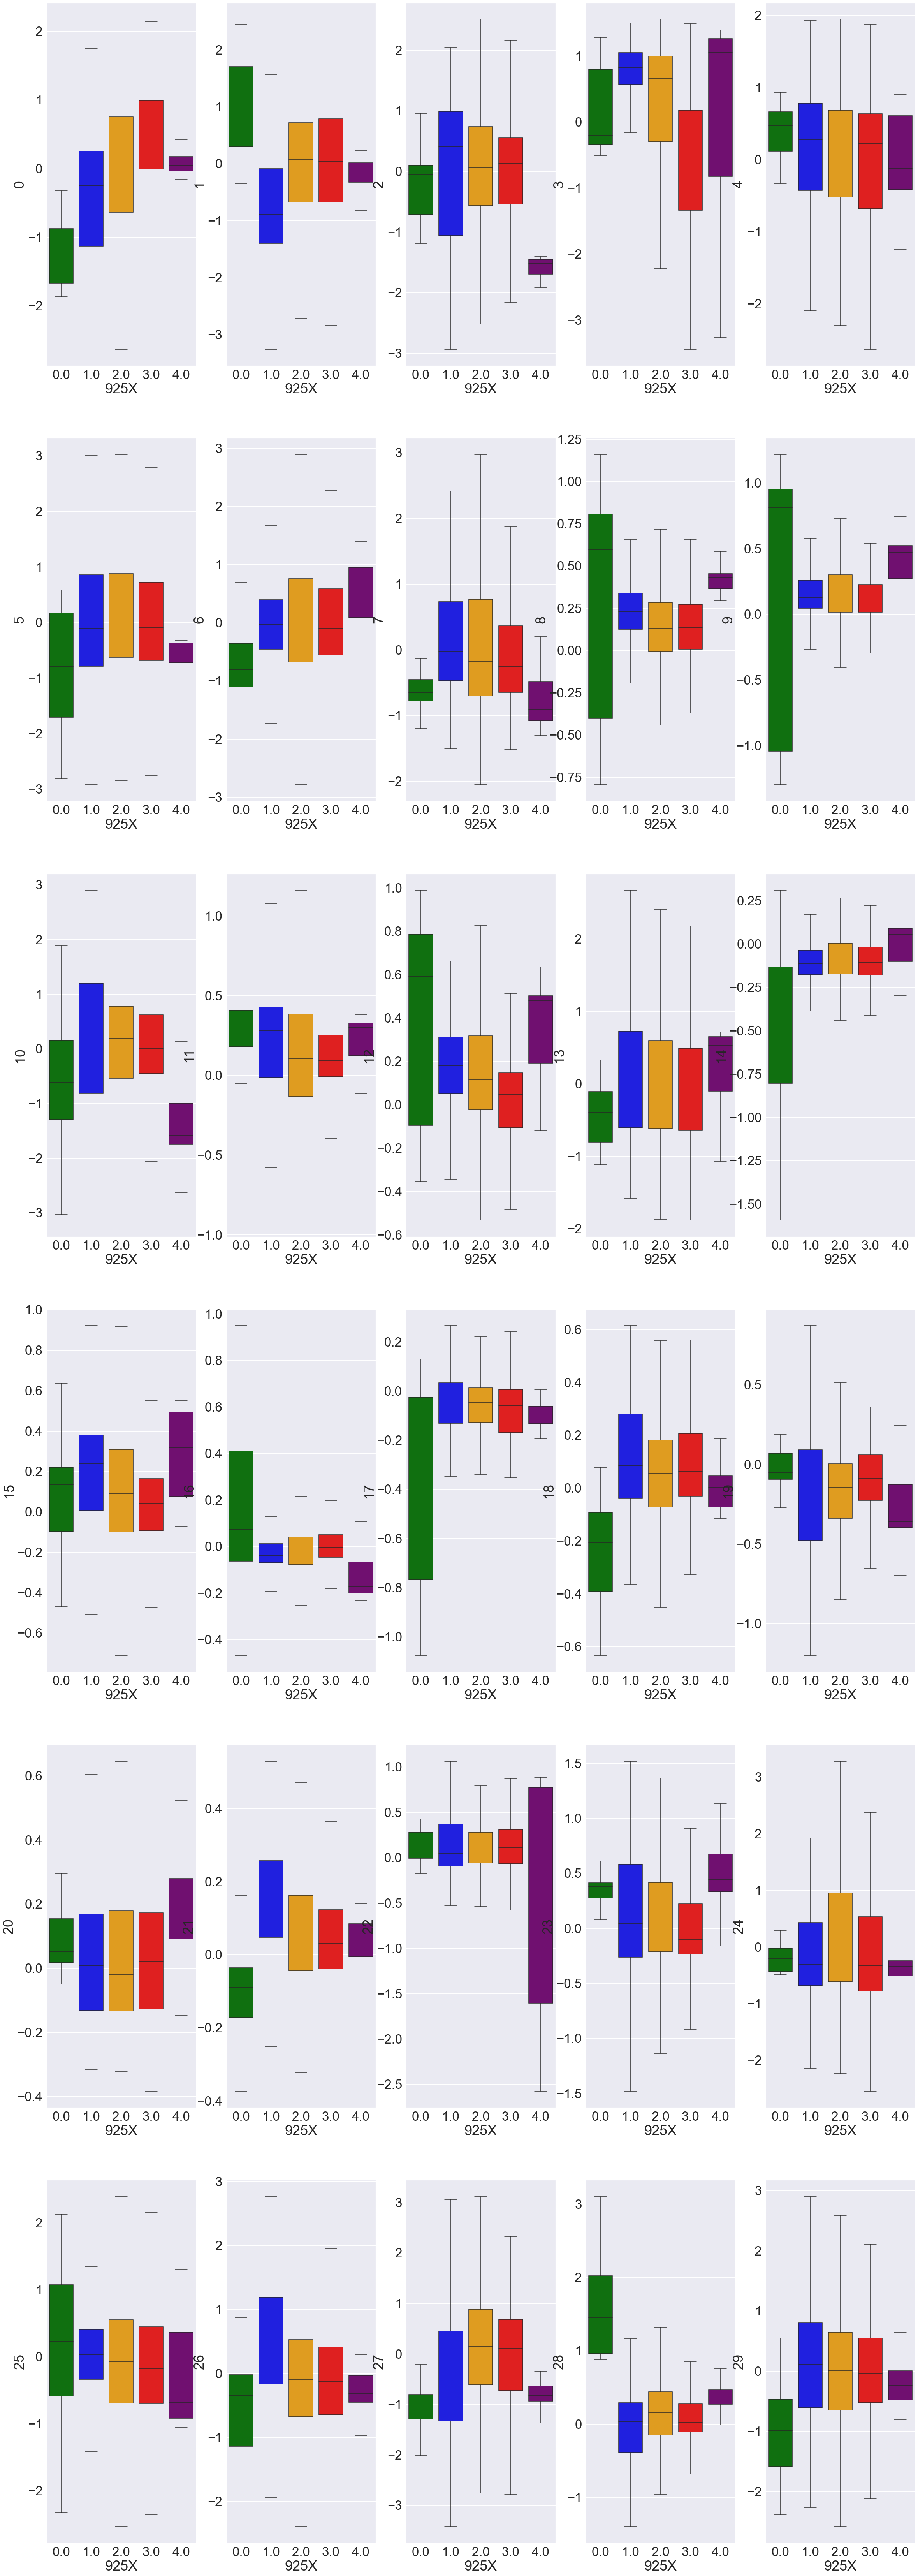

In [40]:
# dta_pl = dta_clu.loc[dta_clu['clu']==1]
# dta_pl = dta_pl[dh_var.columns.to_list()]
dta_pl = dt_pl
plt.style.use('seaborn-white')
my_pal3 = {0:'green',1: "blue", 2:"orange",3:'red',4:'purple'}

sns.set(font_scale =3)
fig, ax = plt.subplots(6, 5, figsize=(40, 120))

xvar = '925X'
for k in range(6):
    j = k*5
    
    #my_order = dt.groupby(by=["Stress"])[dfs2.columns[j]].mean().sort_values(ascending=False).index
    sns.boxplot(x=dta_pl[xvar], y=dta_pl[dta_pl.columns[j]],  ax=ax[k,0], showfliers = False, palette=my_pal3)
    
   # my_order = dt.groupby(by=["Stress"])[dfs2.columns[j+1]].mean().sort_values(ascending=False).index
    sns.boxplot(x=dta_pl[xvar], y=dta_pl[dta_pl.columns[j+1]],  ax=ax[k,1], showfliers = False, palette=my_pal3)
    
   # my_order = dt.groupby(by=["Stress"])[dfs2.columns[j+2]].mean().sort_values(ascending=False).index
    sns.boxplot(x=dta_pl[xvar], y=dta_pl[dta_pl.columns[j+2]],  ax=ax[k,2], showfliers = False, palette=my_pal3)
  
   # my_order = dt.groupby(by=["Stress"])[dfs2.columns[j+3]].mean().sort_values(ascending=False).index
    sns.boxplot(x=dta_pl[xvar], y=dta_pl[dta_pl.columns[j+3]],  ax=ax[k,3], showfliers = False, palette=my_pal3)
     # my_order = dt.groupby(by=["Stress"])[dfs2.columns[j+3]].mean().sort_values(ascending=False).index
        
    sns.boxplot(x=dta_pl[xvar], y=dta_pl[dta_pl.columns[j+4]],  ax=ax[k,4], showfliers = False, palette=my_pal3)

 ## Determine clusters of all environment

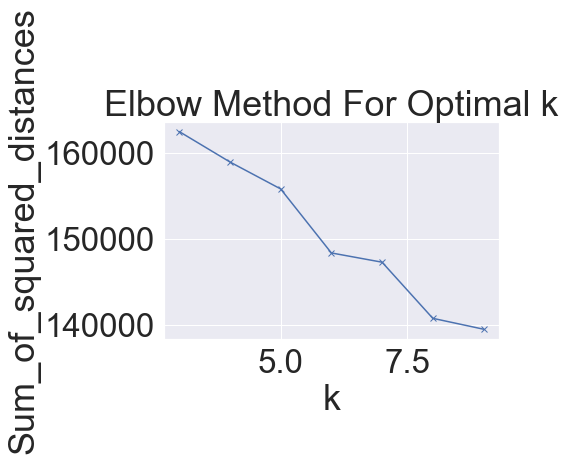

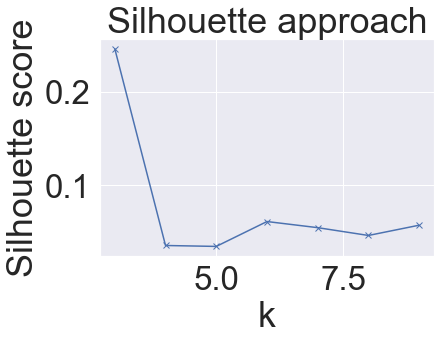

In [545]:
Sum_of_squared_distances = []
sil = []
K = range(3,10)
for k in K:
    km = KMeans(n_clusters=k, n_init=10, max_iter=500, init='k-means++')
    km = km.fit(fac_var)
    Sum_of_squared_distances.append(km.inertia_)
    
    lb = km.predict(fac_var)
    silhouette_avg = silhouette_score(fac_var, lb)
    sil.append(silhouette_avg )
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette approach')
plt.show()

In [546]:
clusters_df1 = pd.DataFrame()
sse_ls1 = []
for rp in range(10):
    kmns = KMeans(n_clusters=6, n_init=5, max_iter=500, init='k-means++')
    kmns.fit(fac_var)

    lb = kmns.labels_
    lb_df = pd.DataFrame(lb)
    clusters_df1 = pd.concat([clusters_df1, lb_df], axis=1)

    sses = kmns.inertia_
    sse_ls1.append(sses)

sse_df1 = pd.DataFrame(sse_ls1)
ind1 = sse_df1[0].argmin(axis=0)
clusters= clusters_df1.iloc[:,ind1]

In [547]:
dh_var2 = dh_var.copy()
dh_var2.index = range(dh_var2.shape[0])
dh_var2['clu'] = clusters
dh_var2.groupby(['clu','location']).size()

clu  location
0    CL           144
     US          1446
1    CL             7
     US           882
2    CL           277
     US          1355
3    CL           111
     US             4
4    CL            28
     US          1406
5    US           110
dtype: int64

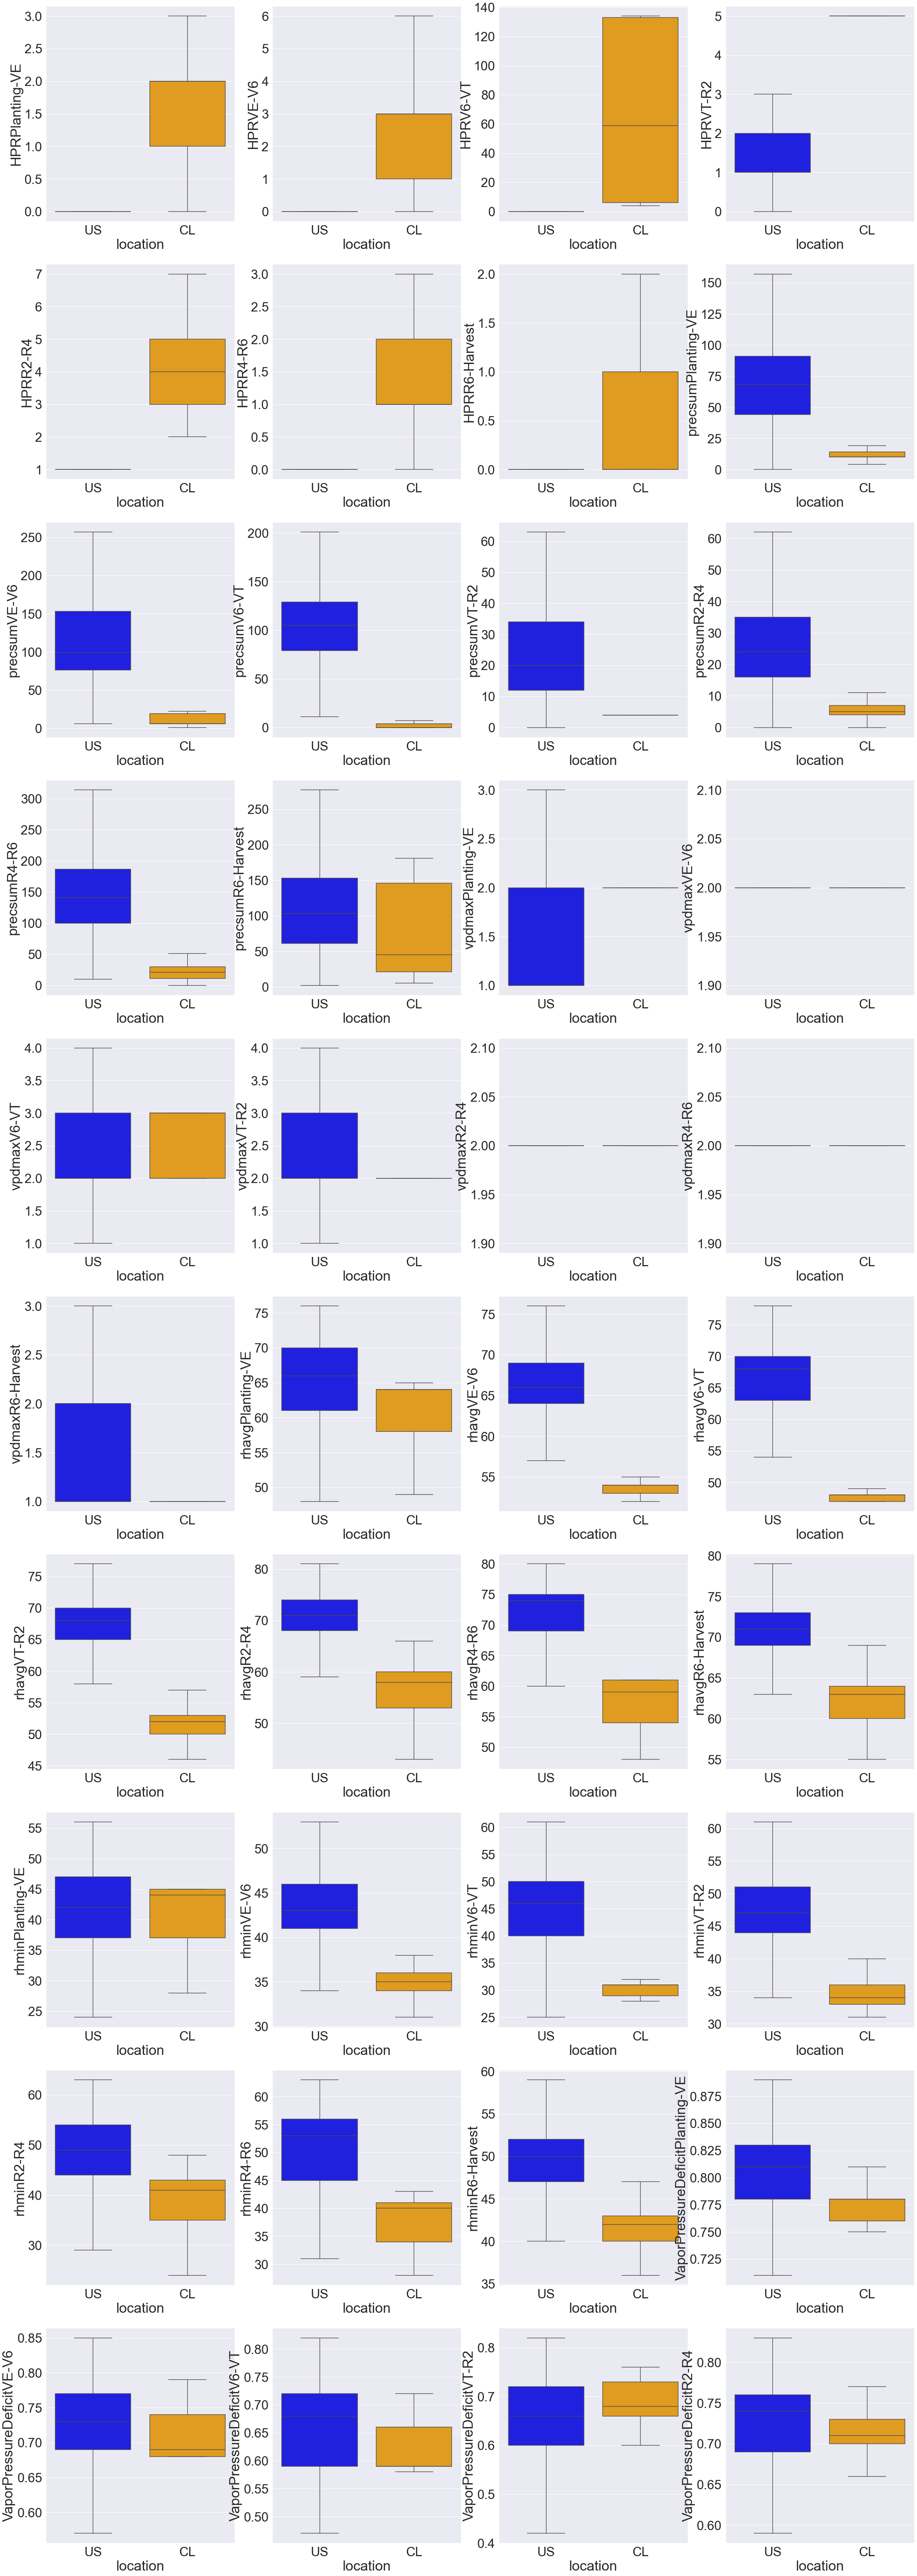

In [548]:
# dta_pl = dta_clu.loc[dta_clu['clu']==1]
# dta_pl = dta_pl[dh_var.columns.to_list()]
dta_pl = dh_var2.loc[dh_var2['clu']==2]
plt.style.use('seaborn-white')
my_pal3 = {'US': "blue", 'CL':"orange",2:'red'}

sns.set(font_scale =3)
fig, ax = plt.subplots(10, 4, figsize=(40, 120))

#dt['ygsmn'] = dt['ygsmn']/10
for k in range(10):
    j = k*4
    
    #my_order = dt.groupby(by=["Stress"])[dfs2.columns[j]].mean().sort_values(ascending=False).index
    sns.boxplot(x=dta_pl['location'], y=dta_pl[dta_pl.columns[j]],  ax=ax[k,0], showfliers = False, palette=my_pal3)
    
   # my_order = dt.groupby(by=["Stress"])[dfs2.columns[j+1]].mean().sort_values(ascending=False).index
    sns.boxplot(x=dta_pl['location'], y=dta_pl[dta_pl.columns[j+1]],  ax=ax[k,1], showfliers = False, palette=my_pal3)
    
   # my_order = dt.groupby(by=["Stress"])[dfs2.columns[j+2]].mean().sort_values(ascending=False).index
    sns.boxplot(x=dta_pl['location'], y=dta_pl[dta_pl.columns[j+2]],  ax=ax[k,2], showfliers = False, palette=my_pal3)
  
   # my_order = dt.groupby(by=["Stress"])[dfs2.columns[j+3]].mean().sort_values(ascending=False).index
    sns.boxplot(x=dta_pl['location'], y=dta_pl[dta_pl.columns[j+3]],  ax=ax[k,3], showfliers = False, palette=my_pal3)

In [549]:
dta_clu_cl = dh_var2.loc[dh_var2['location']=='CL'] 
dta_clu_cl.groupby(['location_code','clu']).size()

location_code  clu
9059           0      102
               1        7
               2      171
               3       56
925X           0       42
               2      106
               3       55
               4       28
dtype: int64

## Determine clusters of environment for Chile

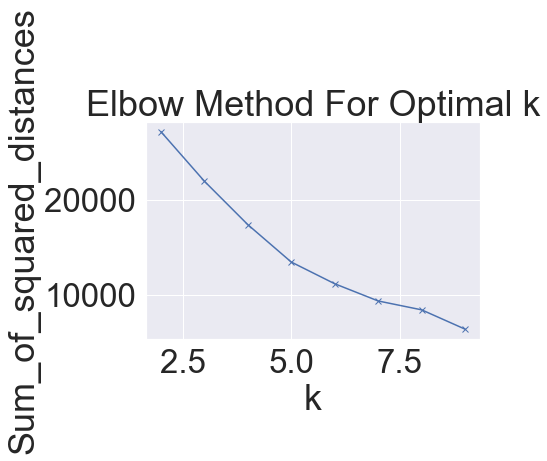

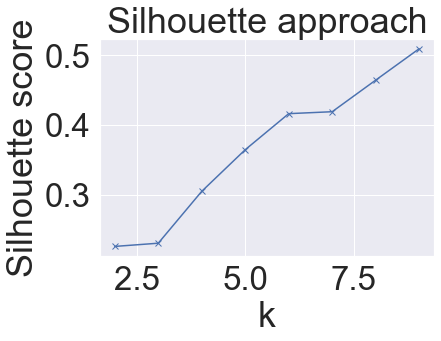

In [550]:
Sum_of_squared_distances = []
sil = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, n_init=5, max_iter=1000, init='k-means++')
    km = km.fit(cl_fac)
    Sum_of_squared_distances.append(km.inertia_)
    
    lb = km.predict(cl_fac)
    silhouette_avg = silhouette_score(cl_fac, lb)
    sil.append(silhouette_avg )
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette approach')
plt.show()

In [551]:
clusters_df1 = pd.DataFrame()
sse_ls1 = []
for rp in range(50):
    kmns = KMeans(n_clusters=3, n_init=5, max_iter=500, init='k-means++')
    kmns.fit(cl_fac)

    lb = kmns.labels_
    lb_df = pd.DataFrame(lb)
    clusters_df1 = pd.concat([clusters_df1, lb_df], axis=1)

    sses = kmns.inertia_
    sse_ls1.append(sses)

sse_df1 = pd.DataFrame(sse_ls1)
ind1 = sse_df1[0].argmin(axis=0)
clusters= clusters_df1.iloc[:,ind1]

In [552]:
clusters.value_counts()

1    408
0    155
2      4
Name: 0, dtype: int64

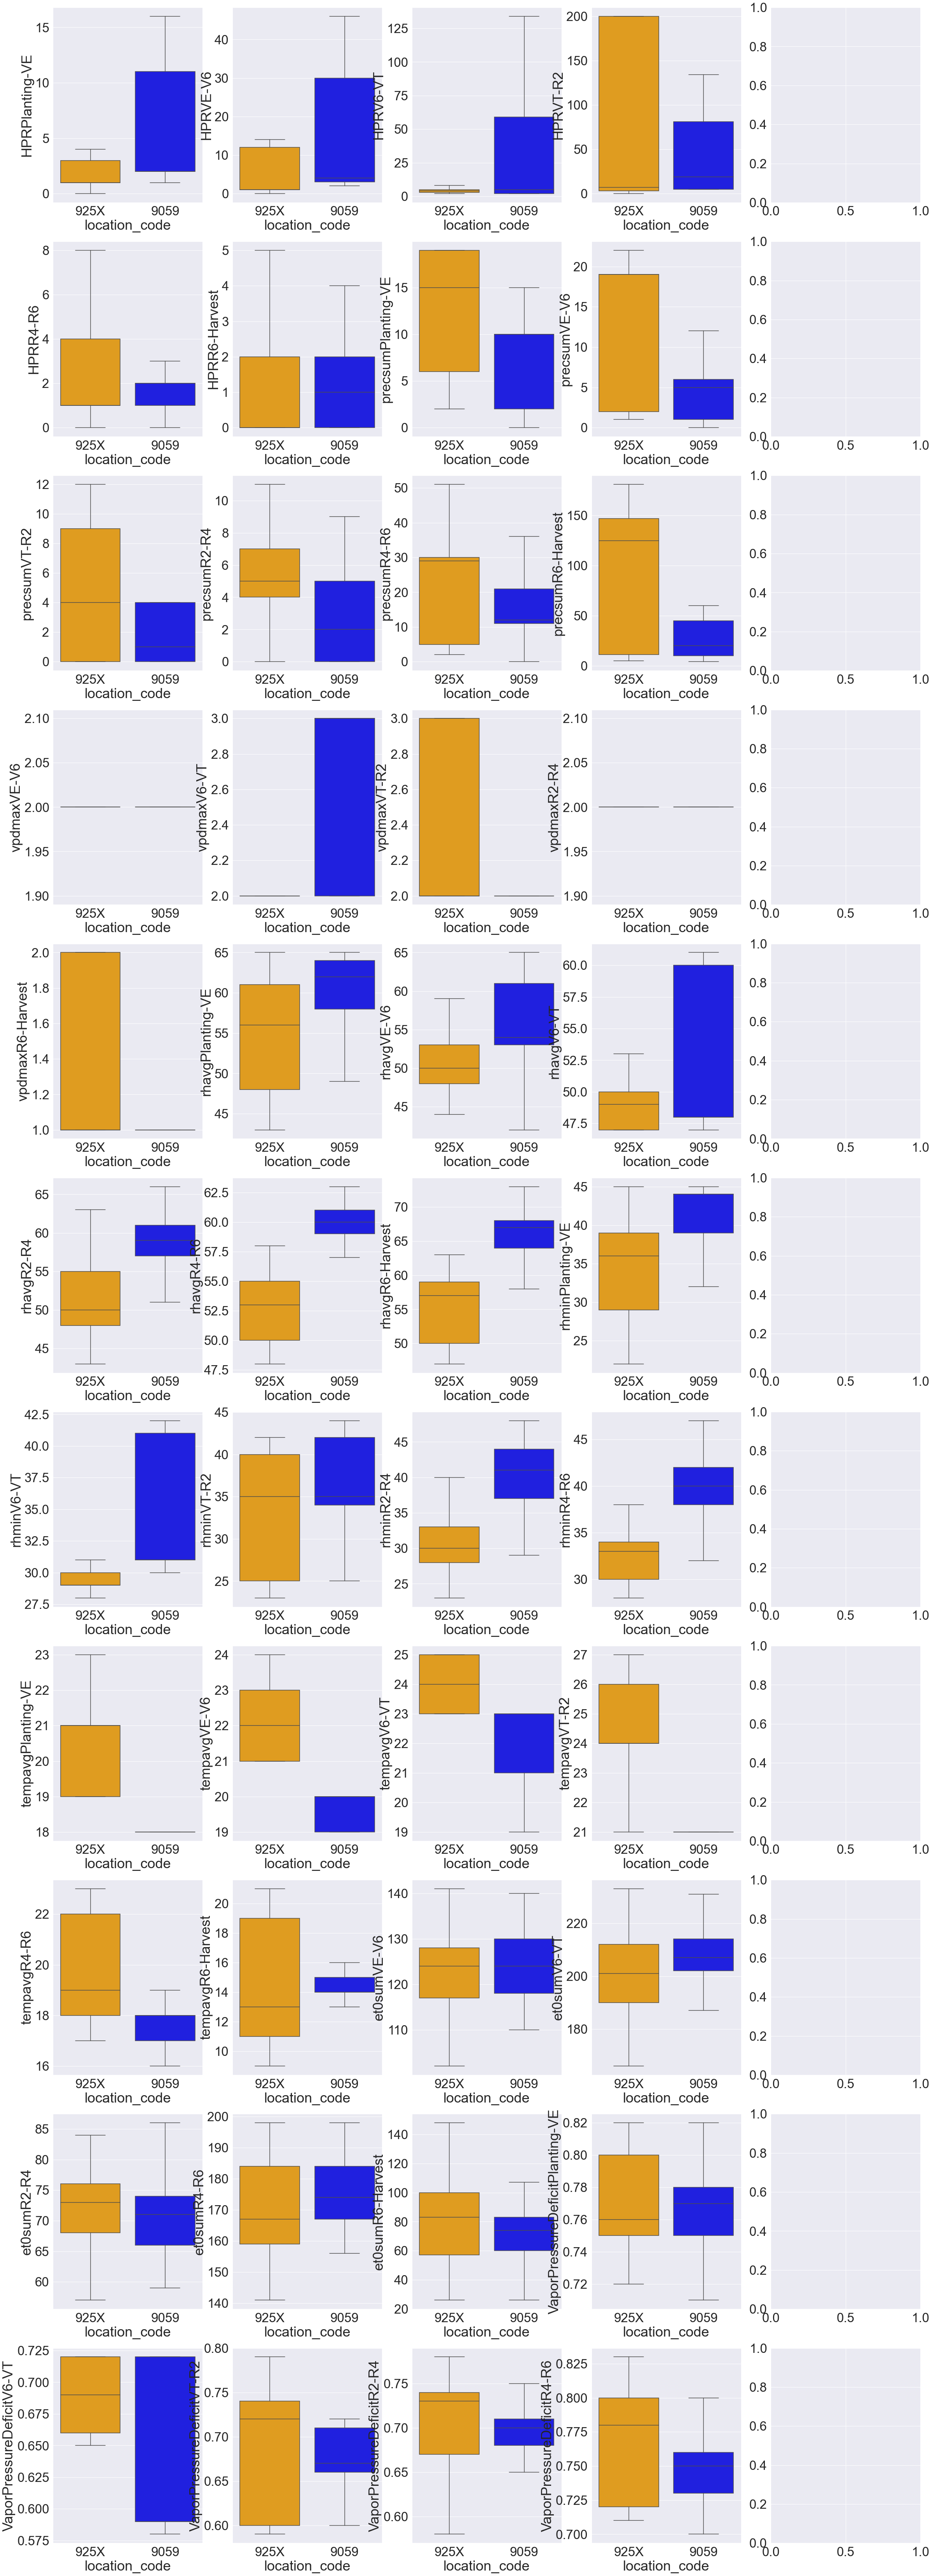

In [523]:
plt.style.use('seaborn-white')
my_pal3 = {0: "blue", 1:"orange",2:'red'}
my_pal3 = {'9059': "blue", '925X':"orange",'992A':'red'}
cl_var.index = cl_fac.index
gwas3 = cl_var.drop(['location','location_code'],axis=1).copy()
gwas3['location_code'] = cl_var['location_code']
gwas3.index = range(gwas3.shape[0])
gwas3['clu'] = clusters
sns.set(font_scale =3)
fig, ax = plt.subplots(11, 5, figsize=(40, 120))

x_var = 'location_code'
#dt['ygsmn'] = dt['ygsmn']/10
for k in range(11):
    j = k*5
    
    #my_order = dt.groupby(by=["Stress"])[dfs2.columns[j]].mean().sort_values(ascending=False).index
    sns.boxplot(x=gwas3[x_var], y=gwas3[gwas3.columns[j]],  ax=ax[k,0], showfliers = False, palette=my_pal3)
    
   # my_order = dt.groupby(by=["Stress"])[dfs2.columns[j+1]].mean().sort_values(ascending=False).index
    sns.boxplot(x=gwas3[x_var], y=gwas3[gwas3.columns[j+1]],  ax=ax[k,1], showfliers = False, palette=my_pal3)
    
   # my_order = dt.groupby(by=["Stress"])[dfs2.columns[j+2]].mean().sort_values(ascending=False).index
    sns.boxplot(x=gwas3[x_var], y=gwas3[gwas3.columns[j+2]],  ax=ax[k,2], showfliers = False, palette=my_pal3)
  
   # my_order = dt.groupby(by=["Stress"])[dfs2.columns[j+3]].mean().sort_values(ascending=False).index
    sns.boxplot(x=gwas3[x_var], y=gwas3[gwas3.columns[j+3]],  ax=ax[k,3], showfliers = False, palette=my_pal3)

In [480]:
clu_ctry = cl_var[['location_code']].copy()
clu_ctry['cluster'] = kmns.labels_
clu2 = clu_ctry.groupby(['location_code','cluster']).size()
clu2

location_code  cluster
9059           1          223
               2          111
925X           0          233
dtype: int64

In [436]:
chi.groupby(['location_code','year']).size()

location_code  year
9059           2016    762
               2017    485
               2018      5
               2019      4
               2020      7
925X           2016    568
               2017    151
               2018    247
               2020      1
992A           2017     31
               2018     33
               2019     32
               2020     34
C3C1           2016      2
               2017      1
C4D1           2016      1
C4D2           2016      1
               2017      1
C4F0           2016      1
               2017      1
C4F1           2016      1
               2017      1
CL01           2016      1
               2017      1
               2018      1
CL02           2016      1
               2017      1
               2018      1
CL03           2016      1
               2017      1
               2018      1
CL04           2016      1
               2017      1
               2018      1
CL05           2016      1
               2017      1
CL06    